In [4]:
# -*- encoding: utf-8 -*-
# @Date    :   2025/01/07 13:22:22
# @Author  :   Hongtai Wang (ongtuai113@gmail.com)



import h5py

file_path = "D:/Data/NSOAS/HY-1C/H1C_OPER_OCT_L3A_20241215_CHL_4KM_13(1).h5"

# 打开并查看文件信息
with h5py.File(file_path, 'r') as h5_file:
    # 显示文件中的所有组
    print("文件中包含的组和数据集结构：")
    def print_structure(name, obj):
        print(name)
    h5_file.visititems(print_structure)

    # 查看文件中的属性
    print("\n文件属性：")
    for attr_name, attr_value in h5_file.attrs.items():
        print(f"{attr_name}: {attr_value}")

    chl_a_data = h5_file["Geophysical Data/chl_a"][:]
    print(f"chl_a shape :{chl_a_data.shape}")


文件中包含的组和数据集结构：
Geophysical Data
Geophysical Data/chl_a

文件属性：
Easternmost Longitude: [180.]
End Day: [350]
End Year: [2024]
Input Files: b'H1C_OPER_OCT_L2B_20241216T000000_20241216T000500_32860_10.h5,H1C_OPER_OCT_L2B_20241215T235500_20241216T000000_32860_10.h5,H1C_OPER_OCT_L2B_20241215T235000_20241215T235500_32860_10.h5,H1C_OPER_OCT_L2B_20241215T234500_20241215T235000_32860_10.h5,H1C_OPER_OCT_L2C_20241215T234500_20241215T235000_32860_10.h5,H1C_OPER_OCT_L2B_20241215T234000_20241215T234500_32860_10.h5,H1C_OPER_OCT_L2C_20241215T234000_20241215T234500_32860_10.h5,H1C_OPER_OCT_L2B_20241215T233806_20241215T234000_32860_10.h5,H1C_OPER_OCT_L2C_20241215T233806_20241215T234000_32860_10.h5,H1C_OPER_OCT_L2B_20241215T233500_20241215T233908_32860_10.h5,H1C_OPER_OCT_L2C_20241215T233500_20241215T233908_32860_10.h5,H1C_OPER_OCT_L2B_20241215T233000_20241215T233500_32860_10.h5,H1C_OPER_OCT_L2C_20241215T233000_20241215T233500_32860_10.h5,H1C_OPER_OCT_L2B_20241215T232500_20241215T233000_32860_10.h5,H1C_OPE

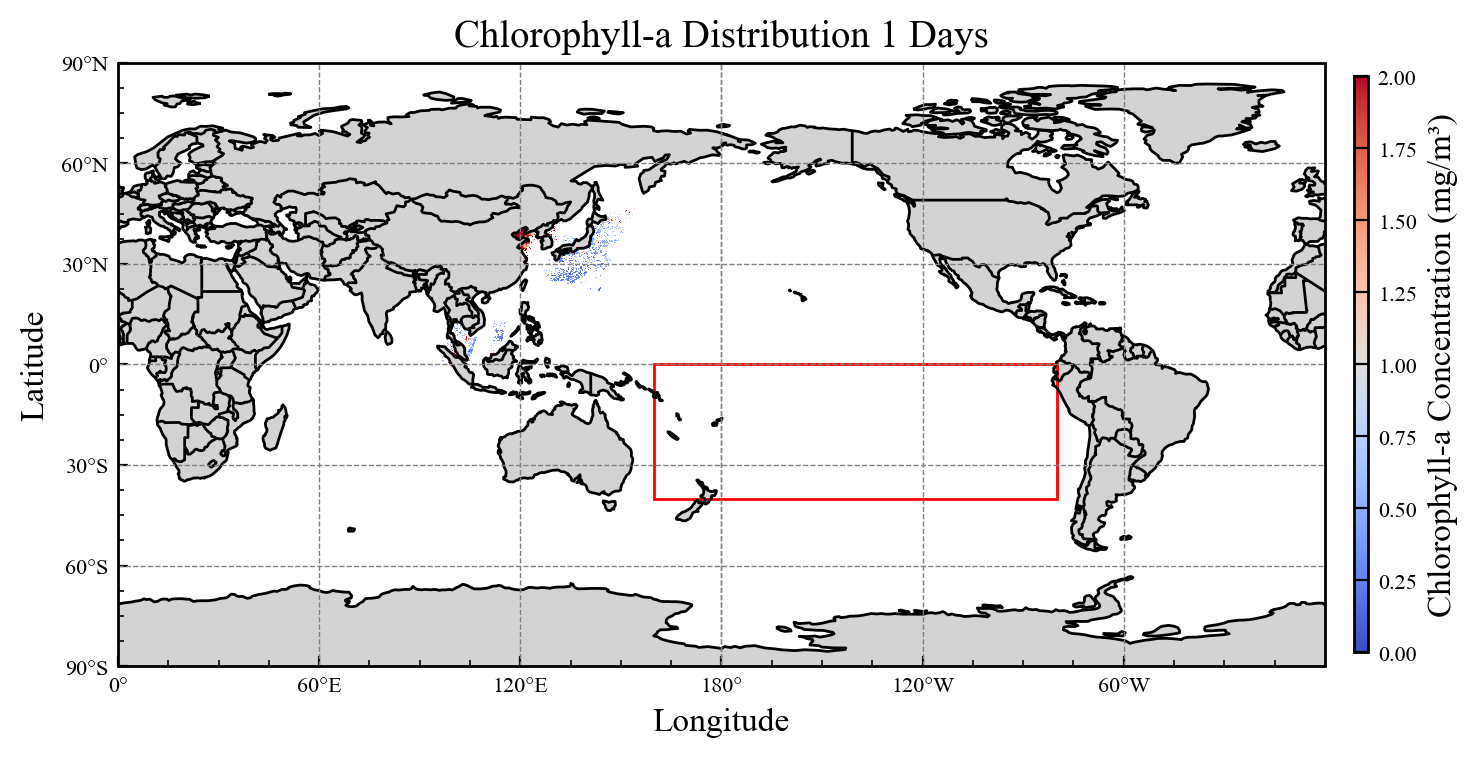

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import matplotlib.patches as patches
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings("ignore",category=UserWarning,module="cartopy")

# 替换为你的 .h5 文件路径
file_path = "D:/Data/NSOAS/HY-1C/H1C_OPER_OCT_L3A_20241215_CHL_4KM_13.h5"

# 打开文件并读取 chl_a 数据
with h5py.File(file_path, "r") as h5_file:
    # 提取叶绿素浓度数据
    chl_a_data = h5_file["Geophysical Data/chl_a"][:]

    # 获取经纬度范围和步长
    lat_step = h5_file.attrs["Latitude Step"][0]
    lon_step = h5_file.attrs["Longitude Step"][0]
    lat_max = h5_file.attrs["Northernmost Latitude"][0]
    lat_min = h5_file.attrs["Southernmost Latitude"][0]
    lon_max = h5_file.attrs["Easternmost Longitude"][0]
    lon_min = h5_file.attrs["Westernmost Longitude"][0]

# 创建经纬度网格，与数据维度完全匹配
latitudes = np.linspace(lat_max, lat_min, chl_a_data.shape[0] + 1) # 这一行需要格外注意原始数据的经纬度方向, 原始数据由北向南
longitudes = np.linspace(lon_min, lon_max, chl_a_data.shape[1] + 1) # 这里+1是因为绘图时经纬度网格需要比数据点多一个
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Mask掉缺测值
chl_a_data = np.ma.masked_where(chl_a_data == -999, chl_a_data)  # 不同的数据缺测值可能不同，这个数据为 -999

# 设置图形参数
plt.rcParams['font.size'] = 8
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.1
plt.rcParams['font.family'] = 'Times New Roman'

# 创建图形并设置大小
fig = plt.figure(figsize=(8, 6), dpi=200)  # 调整大小
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)  # 调整边距

# 创建投影
ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# 添加陆地背景
ax1.add_feature(cfeature.LAND, facecolor='lightgrey')
ax1.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)

# 绘制叶绿素浓度分布图，并限制颜色映射范围
c = ax1.pcolormesh(lon_grid, lat_grid, chl_a_data, shading='flat', cmap='coolwarm', vmin=0, vmax=2, transform=ccrs.PlateCarree())

# 添加颜色条并调整范围
cbar = fig.colorbar(c, ax=ax1, orientation='vertical', pad=0.02, shrink=0.5, aspect=40)
cbar.set_label("Chlorophyll-a Concentration (mg/m³)", fontsize=12)
cbar.ax.yaxis.set_label_position('right')
cbar.minorticks_off()
cbar.ax.tick_params(length=5)

# 设置标题
ax1.set_title("Chlorophyll-a Distribution 1 Days", fontsize=14)

# 设置坐标轴
ax1.set_xlabel("Longitude", fontsize=12)
ax1.set_ylabel("Latitude", fontsize=12)

# 添加海岸线
ax1.coastlines()

# 设置刻度``
ax1.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.xaxis.set_major_locator(mticker.MultipleLocator(60))
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator(4))

# 添加网格线
gridlines = ax1.gridlines(draw_labels=False, linestyle='--', linewidth=0.5, color='grey')

# 绘制矩形框
rect = patches.Rectangle(xy=(160, -40), width=120, height=40, linewidth=1, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree())
ax1.add_patch(rect)

# 保存图像到指定目录
output_path = "D:/Data/NSOAS/HY-1C/CHL_1D_cn.png"
plt.savefig(output_path, format='png')

plt.tight_layout()
plt.show()


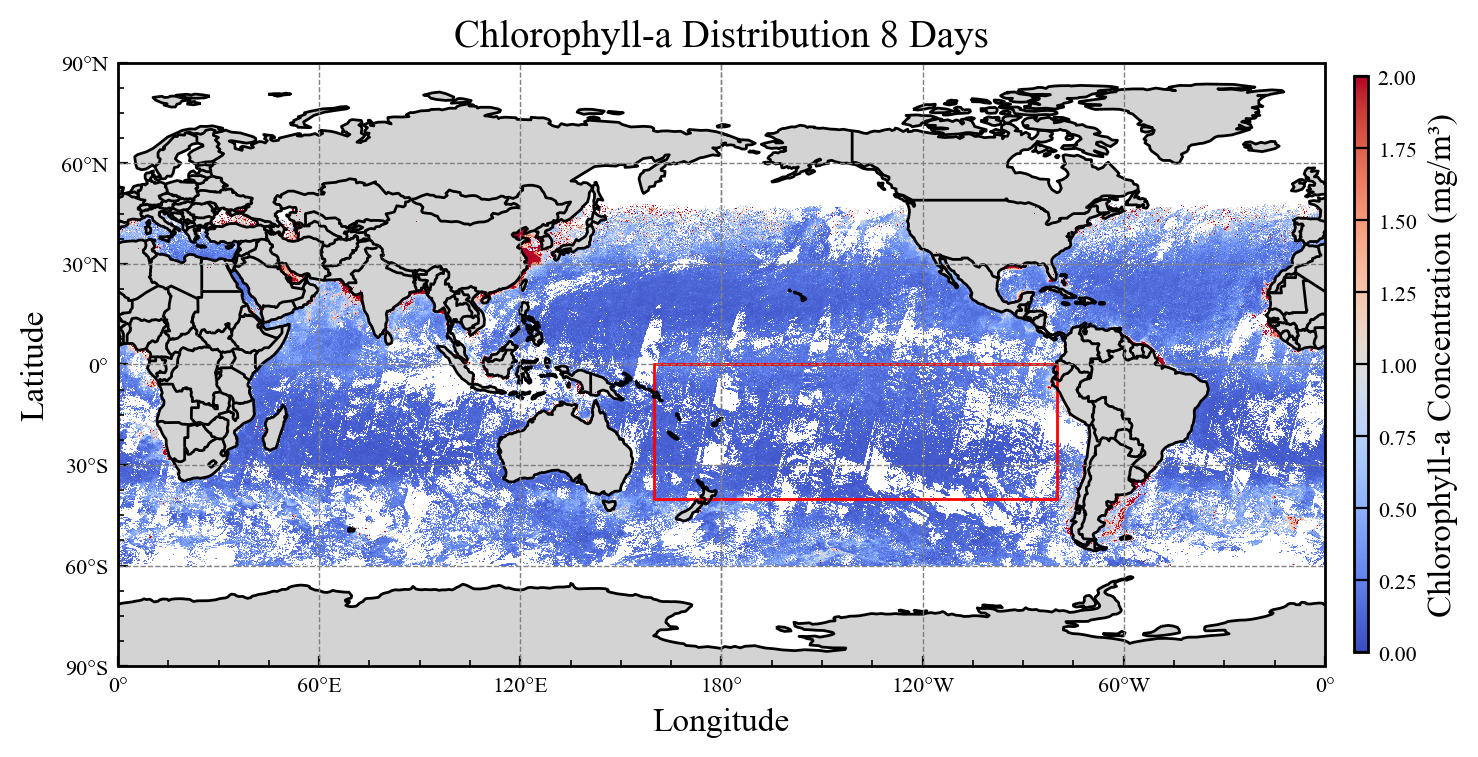

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import matplotlib.patches as patches
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings("ignore",category=UserWarning,module="cartopy")

# 替换为你的 .h5 文件路径
file_path = "D:/Data/NSOAS/HY-1C/H1C_OPER_OCT_L3B_20241201_20241208_8D_CHL_4KM_13.h5"

# 打开文件并读取 chl_a 数据
with h5py.File(file_path, "r") as h5_file:
    # 提取叶绿素浓度数据
    chl_a_data = h5_file["Geophysical Data/chl_a"][:]

    # 获取经纬度范围和步长
    lat_step = h5_file.attrs["Latitude Step"][0]
    lon_step = h5_file.attrs["Longitude Step"][0]
    lat_max = h5_file.attrs["Northernmost Latitude"][0]
    lat_min = h5_file.attrs["Southernmost Latitude"][0]
    lon_max = h5_file.attrs["Easternmost Longitude"][0]
    lon_min = h5_file.attrs["Westernmost Longitude"][0]

# 创建经纬度网格，与数据维度完全匹配
latitudes = np.linspace(lat_max, lat_min, chl_a_data.shape[0] + 1) # 这一行需要格外注意原始数据的经纬度方向
longitudes = np.linspace(lon_min, lon_max, chl_a_data.shape[1] + 1)
lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)

# Mask掉缺测值
chl_a_data = np.ma.masked_where(chl_a_data == -999, chl_a_data)  # 不同的数据缺测值可能不同，这个数据为 -999



# 设置图形参数
plt.rcParams['font.size'] = 8
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.1
plt.rcParams['font.family'] = 'Times New Roman'

# 创建图形并设置大小
fig = plt.figure(figsize=(8, 6), dpi=200)  # 调整大小
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)  # 调整边距

# 创建投影
ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# 添加陆地背景
ax1.add_feature(cfeature.LAND, facecolor='lightgrey')
ax1.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)

# 绘制叶绿素浓度分布图，并限制颜色映射范围
c = ax1.pcolormesh(lon_grid, lat_grid, chl_a_data, shading='flat', cmap='coolwarm', vmin=0, vmax=2, transform=ccrs.PlateCarree())

# 添加颜色条并调整范围
cbar = fig.colorbar(c, ax=ax1, orientation='vertical', pad=0.02, shrink=0.5, aspect=40)
cbar.set_label("Chlorophyll-a Concentration (mg/m³)", fontsize=12)
cbar.ax.yaxis.set_label_position('right')
cbar.minorticks_off()
cbar.ax.tick_params(length=5)

# 设置标题
ax1.set_title("Chlorophyll-a Distribution 8 Days", fontsize=14)

# 设置坐标轴
ax1.set_xlabel("Longitude", fontsize=12)
ax1.set_ylabel("Latitude", fontsize=12)

# 添加海岸线
ax1.coastlines()

# 设置刻度
ax1.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.xaxis.set_major_locator(mticker.MultipleLocator(60))
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator(4))

# 添加网格线
gridlines = ax1.gridlines(draw_labels=False, linestyle='--', linewidth=0.5, color='grey')

# 绘制矩形框
rect = patches.Rectangle(xy=(160, -40), width=120, height=40, linewidth=1, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree())
ax1.add_patch(rect)

# 保存图像到指定目录
output_path = "D:/Data/NSOAS/HY-1C/CHL8D.png"
plt.savefig(output_path, format='png')

plt.tight_layout()
plt.show()